# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import trange
%matplotlib inline

import sys
sys.path.append('C:\\Users\\lucai\\nuvPriors_repo\\nuvPriors')
from src.models.covModel import COVModel

# Data Generation

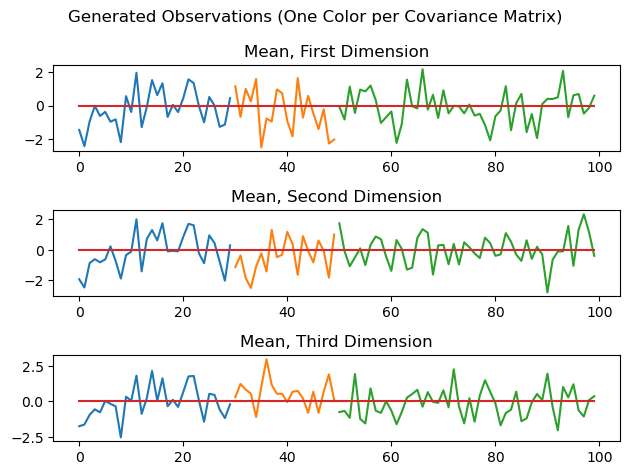

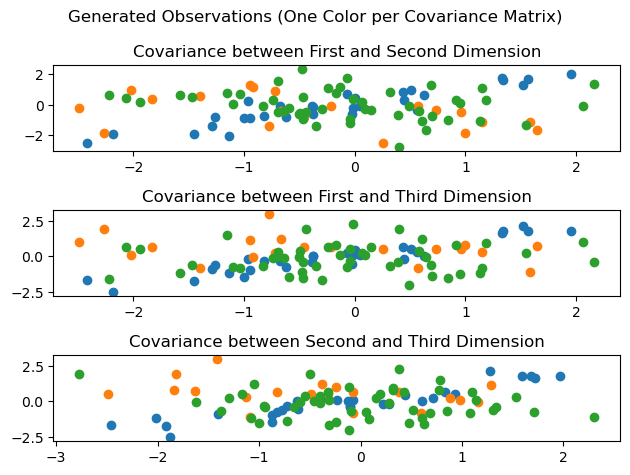

In [2]:
# Specify Parameters
N = 100
D = 3
seed = 0
np.random.seed(seed)

# Specify model indices
selectedModel = np.concatenate(
    (np.zeros(int(0.3*N), dtype=int), 
     np.ones(int(0.2*N), dtype=int), 
     np.ones(int(0.5*N), dtype=int)*2), 
    axis=0)

# Specify noise covariance matrices
mean = np.array([0.0, 0.0, 0.0])
covNoises = np.array([
    [[1.0, 0.9, 0.9], [0.9, 1.0, 0.9], [0.9, 0.9, 1.0]], 
    [[1.5, -0.25, -0.5], [-0.25, 1.25, -0.5], [-0.5, -0.5, 1.0]],
    [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]])

# Calculate X and Y
x = np.tile(mean, (N,1))
sigma = np.array([covNoises[selectedModel_i] for selectedModel_i in selectedModel])
y = np.array([np.random.multivariate_normal(mean, covNoises[selectedModel_i]) for selectedModel_i in selectedModel])
   
# Plot data 
modelChange_ind = []
for i in range(1,N):
    if selectedModel[i-1] != selectedModel[i]:
        modelChange_ind.append(i)
modelChange_ind.append(N)

fig11, axs1 = plt.subplots(3,1)
fig12, axs2 = plt.subplots(3,1)

start_ind = 0
for end_ind in modelChange_ind:
    axs1[0].plot(np.arange(start_ind, end_ind), y[start_ind:end_ind, 0])
    axs1[1].plot(np.arange(start_ind, end_ind), y[start_ind:end_ind, 1])
    axs1[2].plot(np.arange(start_ind, end_ind), y[start_ind:end_ind, 2])
    axs2[0].scatter(y[start_ind:end_ind,0], y[start_ind:end_ind,1])
    axs2[1].scatter(y[start_ind:end_ind,0], y[start_ind:end_ind,2])
    axs2[2].scatter(y[start_ind:end_ind,1], y[start_ind:end_ind,2])
    start_ind = end_ind
axs1[0].plot(x[:,0], c='tab:red')
axs1[1].plot(x[:,1], c='tab:red')
axs1[2].plot(x[:,2], c='tab:red')

# Describe plot
axs1[0].set_title('Mean, First Dimension')
axs1[1].set_title('Mean, Second Dimension')
axs1[2].set_title('Mean, Third Dimension')
axs2[0].set_title('Covariance between First and Second Dimension')
axs2[1].set_title('Covariance between First and Third Dimension')
axs2[2].set_title('Covariance between Second and Third Dimension')
fig11.suptitle('Generated Observations (One Color per Covariance Matrix)')
fig11.tight_layout()
fig12.suptitle('Generated Observations (One Color per Covariance Matrix)')
fig12.tight_layout()

# Estimation

In [3]:
# Initialize estimator
estimator = COVModel(N=N, D=D)

# Do estimation
start_time = time.time()
changes, i_it = estimator.estimate_VICF(z_hat=y-x)
stop_time = time.time()
conv_time = stop_time - start_time

########################################################################################################################

# Plot estimations

C:\Users\lucai\nuvPriors_repo\nuvPriors\src\models\pwcModel.py:346: RuntimeWarning: divide by zero encountered in divide
  np.abs(mk_hat_new - self.mk_hat) / np.abs(self.mk_hat))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (2, 100, 6) + inhomogeneous part.